<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/Week_4/Week_4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import to load arff file from url
from scipy.io import arff
import urllib.request
import io

# Sklearn import
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Normalization and standard scaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Label and 1-hot encoding
from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.linear_model import LogisticRegressionCV # Logistic regression with cross-validation
from sklearn.metrics import accuracy_score  # Accuracy
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score  # Precision, recall, and f1 score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree # Decision Trees
from sklearn.model_selection import GridSearchCV   # Grid search for cross validation



# Classification

## Content

The goal of this walkthrough is to provide you with insights on classification, focusing on one technique called logistic regression. After presenting the main concepts, you will be introduced to the techniques to implement the algorithms in Python. Finally, it will be your turn to practice, using an application on forest fires.

The notebook is organized as follows:

>[Classification](#scrollTo=a844a8c0-078c-4946-8927-e570469c601c)

>>[Content](#scrollTo=4392fab0-671b-45ea-b27a-61a797c0e090)

>>[Background](#scrollTo=7763984b-c9d6-43b0-ba06-fd749431aa32)

>>>[1.1 Objective](#scrollTo=7763984b-c9d6-43b0-ba06-fd749431aa32)

>>>[1.2 Examples of classification](#scrollTo=5292f5e7-73c2-41f3-af5f-17d4dcbe9fd9)

>>>[1.3 Logistic regression model](#scrollTo=251e9265-3d22-4a07-8838-23b32fce472f)

>>>>[Logistic Loss function](#scrollTo=1edb4df8-98f9-4903-ae42-65e57e0d8a84)

>>[Implementation](#scrollTo=ce878d70-296b-4ce2-9a05-a5d0410d79e1)

>>>[2.1 Load and discover dataset](#scrollTo=751923ff-7b61-4ab9-af76-1b6b98b9e1f7)

>>>[2.2 Splitting the dataset](#scrollTo=2da1d609-f411-4205-9026-f452795d8dac)

>>>[2.3 Rescaling](#scrollTo=d607ddfc-bfab-4834-a4fb-a54e93b12114)

>>>[2.4 Building and training our classifier](#scrollTo=4f0a1b43-4e06-4b70-8a83-c5e58d99e2d7)

>>>[2.5 Using the classifier to make prediction](#scrollTo=4185d54b-63ca-41d0-a48a-2b4ea7930baa)

>>>[2.6 Evaluating our classifier](#scrollTo=0dc6921d-d075-4f8c-9ef8-e7ebdb150513)

>>>>[2.6.1 Accuracy](#scrollTo=c9a3e15a-dd3f-40ec-afa7-782e5ba2fc5c)

>>>>[2.6.2 Default Rate](#scrollTo=d5a03395)

>>>>[2.6.3 Confusion matrix](#scrollTo=00d4d413-7a87-4590-a54f-cc5b6d44bb8e)

>>>>[2.6.4 Precision and Recall](#scrollTo=c22860d3-e863-4045-b487-9ffbdc36093c)

>>>>[2.6.5 Classification Report](#scrollTo=3a44c38e)

>>>[2.7 Adding cross-validation](#scrollTo=3592471e-12a9-4ef8-9085-d7b58cefeded)

>>[Your turn !](#scrollTo=h28lWAXVDtu7)

>>>[Discover your dataset](#scrollTo=6ea0a3ee-2fda-45e2-bfbe-98f601ad0671)

>>>[Multi-features logistic regression](#scrollTo=ypmEjcXnN1yQ)

>>[Decision Trees](#scrollTo=3ee02d36-e94a-43b6-a3b6-c3d6eaac1741)

>>>[3.1 Background](#scrollTo=14273048-92d9-48a1-a974-71edda505929)

>>>>[3.1.1 Intuition](#scrollTo=28ba57c8)

>>>>[3.1.2 Decision criteria](#scrollTo=eea9938a)

>>>[3.2 Implementation](#scrollTo=8bed40bd-9056-405a-b89b-15e479752fd0)

>>>>[3.2.1 Building, training, and evaluating our classifier](#scrollTo=59fa75a7-714d-4128-8ab2-93730c5f7c79)

>>>[3.3 Tuning parameters with cross-validation](#scrollTo=95489c7f-e616-47a0-8908-8c26c2eca5e9)

>>>[3.4 Visualize tree](#scrollTo=76e13259-d288-4de5-9c2e-32e9c2127848)

>>[Your turn !](#scrollTo=a8367747-4cbe-45e1-8003-b4ba277f2741)

>>[k-Nearest Neighbords (kNN)](#scrollTo=e43f558b)

>>>[4.1 Intuition](#scrollTo=748919c8)

>>>[4.2 Implementation](#scrollTo=7b0ff6e8)

>>[Encoding categorical variable](#scrollTo=93cf961d)

>>>[One-Hot Encoding](#scrollTo=96f87619)

>>>[Label Encoding](#scrollTo=029ea815)

>>>[Implementation](#scrollTo=19a12e8c)



## 1. Background <a class="anchor" id="Background"></a>

### 1.1 Objective <a class="anchor" id="Objective"></a>

We now move from regression another important branch of machine learning: classification. As the name indicates, the idea is to classify items of a dataset into **predefined classes** for which labelled data is already available.

Classification is similar to regression, but instead of predicting a continuous target, classification algorithms attempt to apply a discrete number of labels or classes to each observation.

While in a regression the targets are generally numerical and continuous-valued, oftentimes the targets in classification are categorical.  

However, classification can be applied in settings where the target is numerical. For example, we might want to predict whether the unemployment rate for a country will be low, medium, or high, but do not care about the actual number. In such cases, determining the "optimal" way to categorize our target variable might require some creativity, and it is important to properly justify our assumptions.

Finally, note that many problems can be written either as classification or regression. Hence, many ML algorithms have variants that perform regression or classification tasks.

### 1.2 Examples of classification

- Image classification: e.g., is this a cat or not?
- Audio classification: identify bird species from birdsong
- Labeling emails: is it a spam or not?
- Risky or safe loan application: should a bank provide a loan to applicant or not?
- Prediction of customer behaviour: will a customer buy this new product or not?  
- Prediction of economic performance of a country: will there be a recession or not?  
- etc.

### 1.3 Logistic regression model

Suppose we have *n* observations of an outcome $\boldsymbol{y}$ and *d* associated features $\boldsymbol{x_1}$, $\boldsymbol{x_2}$, ... , $\boldsymbol{x_d}$ (note that $\boldsymbol{y}$, $\boldsymbol{x_1}$, ..., $\boldsymbol{x_d}$ are vectors):

| | Outcome | Feature 1 | Feature 2 | ... | Feature d |
|:-------|:----------:|:----------:|:----------:|:----------:|:----------:|
| Observation 1 | $y_1$ | $x_{11}$ | $x_{12}$ | ... | $x_{1d}$ |
| Observation 2 | $y_2$ | $x_{21}$ | $x_{22}$ | ... | $x_{2d}$ |
| ... | ... | ... | ... | ... | ... |
| Observation n | $y_n$ | $x_{n1}$ | $x_{n2}$ | ... | $x_{nd}$ |

We will focus on binary classification for now. In other words, our outcome can take two values, 0 and 1, which represent two classes (e.g., cat or dog, spam email or not, risky or safe loan, etc.).

Remember when we did multivariate linear regression, we assumed that our model function $f_{\text{mv}}$, i.e., our prediction, was a linear combination of our features. For each observation $i$, we assumed:
$$f_{\text{mv}}(\boldsymbol{X_{i*}}, \boldsymbol{w}):=w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d}$$
with $\boldsymbol{w}=(w_0, w_1, ..., w_d)$ the vector of weights, and $\boldsymbol{X}=[\boldsymbol{x_1}$, ... , $\boldsymbol{x_d}]$ the matrix of feature variables.

For each observation, our true outcome was $y_i = f_{\text{mv}}(\boldsymbol{X_{i*}}, \boldsymbol{w}) + \epsilon_i$, and our goal was to minimize the errors.

In this setting, our model function $f_{\text{mv}}$ can take any values. It is thus suited when our outcome is continuous. However, with binary classification, we are dealing with discrete values, and more precisely with 0 and 1. How can we modify our model to obtain better prediction?

The idea of logistic regression is to transform the predictions obtained with a linear regression such that the predictions are between 0 and 1. To do so, we rely on the [Sigmoid (logistic) function](https://en.wikipedia.org/wiki/Sigmoid_function):

$$S(x) = \frac{1}{1 + e^{-x}}$$

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png' width="300">
</center>

Source: Qef, from [Wikipedia Logistic Curve plot](https://commons.wikimedia.org/wiki/File:Logistic-curve.svg)

With logistic regression, we apply the sigmoid function to the output of the multivariate regression model. Let $f_{\text{logi}}$ be the prediction function of a logistic regression, we have:

$$f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}):= \frac{1}{1 + e^{-(w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d})}}$$

$f_{\text{logi}}$ represents the probability that a given observation belongs to class 1, i.e., $y_i=1$:
- We predict that the observation belongs to class 1 when $f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}) \geq 0.5$, i.e., when $w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d} \geq 0$;
- Reciprocally, we predict that the observation belongs to class 0 when $f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w})<0.5$, i.e., $w_0 + w_1 x_{i,1} +  w_2 x_{i,2} + ... +  w_d x_{i,d}<0$.

Now our problem is the same as before: we want to minimize the errors of our model, learning the weights $w_0$, $w_1$, ..., $w_d$ from our data. To do so, we are minimizing our loss function... but which one? We will explore one option below.

*Note*: In the case of multiclass logistic regression, the idea is the same: we need to transform the output of our multivariate model. However, instead of using the sigmoid function, we are applying the [Softmax function](https://en.wikipedia.org/wiki/Softmax_function), a generalization of the sigmoid function.  

#### Logistic Loss function

For linear regression, we used the Least Squared Error as loss function:

$$ \min_{\boldsymbol{w}} \sum_{i=1}^n (y_i - f_{\text{mv}}(\boldsymbol{X_{i*}}, \boldsymbol{w}))^2 $$


Can we use the same for logistic regression? No! Indeed, using Least Squared Error with our new prediction function $f_{\text{mv}}$ would result in a non-convex graph, which is not ideal for our minimization problem since we could be stuck in local minima:

<center>
<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3o9_XoQP4TaceYPRZVHlxg.png' width="300">
</center>

Source: Issam Laradji, [Non-convex Optimization](https://www.cs.ubc.ca/labs/lci/mlrg/slides/non_convex_optimization.pdf)

So which loss function can we use? Ideally, we want to assign more punishment when predicting 1 while the actual value is 0 and when predicting 0 while the actual value is 1. One such function is the... **Logistic Loss**:

$$L(\boldsymbol{y}, \boldsymbol{X}, \boldsymbol{w})= -\frac{1}{n} \sum_{i=1}^n [y_i \log(f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w})) + (1-y_i) \log(1-f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}))] $$

Let's decompose our function to understand a bit more how it works. For each observation $i$, the cost is:

$$\text{Cost}_i = - y_i \log(f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w})) - (1-y_i) \log(1-f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}))$$

- When $y_i = 1$, $\text{Cost}_i = - \log(f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}))$. Hence, if our predicted probability is 1, we have $\text{Cost}_i=0$, i.e., no cost. However, when our predicted probability is approaching 0, our cost goes to infinity (because the logarithm goes to minus infinity when we get closer to zero).
- When $y_i = 0$, $\text{Cost}_i = - \log(1-f_{\text{logi}}(\boldsymbol{X_{i*}}, \boldsymbol{w}))$, and it works the other way around. If our predicted probability is zero, the cost is zero, but when our predicted probability is approaching 1, our cost goes to infinity.

<center>
<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_NeTem-yeZ8Pr9cVUoi_HA.png' width="400">
</center>

Source: Shuyu Luo, [Loss Function (Part II): Logistic Regression](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11)

The Logistic Loss not only punishes errors with a very large cost, it is also convex. Hence, we can still apply Gradient Descent, Newton's Method, and other optimization algorithms!

To learn more:
- [Loss Function (Part II): Logistic Regression](https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-ii-d20a239cde11), by Shuyu Luo, Published in Towards Data Science
- [Understanding the log loss function](https://medium.com/analytics-vidhya/understanding-the-loss-function-of-logistic-regression-ac1eec2838ce), by Susmith Reddy, Published in Analytics Vidhya


## 2. Implementation

We are already familiar with the **sklearn** library, when we implemented regression algorithms last week ([Documentation](https://scikit-learn.org/stable/index.html)). We will keep on using this library to implement a logistic regression.

For the walkthough we will use a **dataset on wine quality**. As usual, you can find it in the /data folder.

<img src='https://assets.pbimgs.com/pbimgs/rk/images/dp/wcm/202145/0002/schott-zwiesel-classico-wine-glasses-c.jpg' width="300">

The wine data set consists of 11 different parameters of wine such as alcohol content, acidity, and pH, which were measured for several wine samples from the North of Portugal.

Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In *Decision Support Systems*, Elsevier, 47(4):547-553, 2009. Dataset obtained from UCI Machine Learning repository, [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality).

These wines were derived from different cultivars; therefore there have different quality, as a score between 0 and 10. We grouped the wines into two quality classes: 0 and 1, representing respectively  "poor quality" (score 0-5), and "good quality" (score 6-10).

Our goal here is to find a model that can predict the class of wine given the 11 measured parameters, and find out the major differences among the two classes.

Ok, let's go!

### 2.1 Load and discover dataset

In [3]:
#Load the dataset
url = "https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/04-classification/data/wine-quality-red.csv"
wines = pd.read_csv(url).drop_duplicates().dropna() # drop duplicates and NaN values

# Display a sample of the data
display(wines.head())

# Print columns
print(wines.columns.values)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


Note that we only have numerical variables, and thus won't need to encode categorical variables.

However, we will need to rescale our features since, for instance, chlorides values are lower than 1 while sulfur dioxide can attain a value of 289:

In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.894040,46.826343,0.996709,3.309787,0.658705,10.432315,0.529065
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447595,33.409287,0.001869,0.155036,0.170667,1.082065,0.499338
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


We now define our features - all wine parameters - and our target variable - the wine quality:

In [5]:
# Define features and target variable
X = wines.drop(columns='quality')
y = wines['quality']

We know check how many observations we have for each class:

In [6]:
# Count the number of observations (rows) corresponding to each value
y.value_counts()

quality
1    719
0    640
Name: count, dtype: int64

We have 719 "good" wines and 640 "poor" quality wines. The number of observations for each class influence the quality of our predictions. Here, our dataset is reasonably balanced.

### 2.2 Splitting the dataset

As always, the first step is to split our data into random training and test subsets. Recall that the training set is used to learn the parameters of our model while the test set is used to evaluate our predictions.

We use the `train_test_split` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) of sklearn, imported with the following line of code (already done at the beginning of the notebook):

```python
from sklearn.model_selection import train_test_split
```

The test size here is of 25% of the original data.

In [7]:
#Split data set into a train and a test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

print(f"The training set has {X_train.shape[0]} observations, and the test set has {X_test.shape[0]} observations.")

The training set has 1019 observations, and the test set has 340 observations.


### 2.3 Rescaling

When we have a dataset with features that have very distinct ranges, we might get biased results. We want the features to be in the same or similar range, which also helps the interpretation of the model parameters (weights).

We therefore **normalize** the data. It involves transforming all values for a specific attribute so that they fall within a small specified range. We can use `StandardScaler()`, ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) `MinMaxScaler()` ([Documentation](https://scikit-learn.org/0.15/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) or others for normalization.

In our example we will normalize both our **train AND test data** using `MinMaxScaler()`. Here is the import line:

```python
from sklearn.preprocessing import MinMaxScaler
```

For each observation $x_{ij}$, with $i$ the observation (row) and $j$ the feature (column), the MinMax Scaler applies the following transformation:  
$$x_{scaled,ij}=\frac{x_{ij} - \min(\boldsymbol{x_j})}{\max(\boldsymbol{x_j})-\min(\boldsymbol{x_j})}$$

**IMPORTANT**: When you normalize the train data, you need to do the same modification (here normalization) to the test data. In other words, you train your scaler on your training set, and apply the same transformation to the training and test set.

In [8]:
# Define the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train) # here the scaler learns the min and max of each attribute from the training set

# Transform the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Note that the fit and transform steps can be merged into one for the training set:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### 2.4 Building and training our classifier

To predict the class of our target variable we use a logistic regression. The sklearn module is called `LogisticRegression()` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). Here is the import line:

```python
from sklearn.linear_model import LogisticRegression
```

Note that L2-regularization is applied by default. By specifying the argument *penalty*, you can specify the regularization techniques, namely 'l1', 'l2', 'elasticnet', or None.

You can also specify the *solver*. By default, 'lbfgs' is used, which stands for [Limited-memory Broyden–Fletcher–Goldfarb–Shanno](https://en.wikipedia.org/wiki/Limited-memory_BFGS).
Note that the choice of the algorithm depends on the penalty chosen. You can refer to the documentation for insights on the choice of solver/penalty depending on your problem and data.

**A short note on solver:**
L-BFGS approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm ([BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)), which is based on [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), an alternative to Gradient Descent. While the Gradient Descent rely on the gradient (first-order derivatives) to update our parameters, Newton's method also makes use of the [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix), i.e., the second-order derivatives. Newton's method generally converges faster than Gradient Descent. However, Newton's method is computationally-expensive and the Hessian might not even exist. Hence, numerical methods called [Quasi-Newton](https://en.wikipedia.org/wiki/Quasi-Newton_method), such as BFGS, have been developed to solve optimization problems.  

In [9]:
# 1. Set up our model
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# 2. Fit our model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

After fitting the model, we can easily retrieve the values of the different weights coefficients: the intercept with `.intercept_`, and the weights of each feature with `.coef_.flatten()`:

In [10]:
# Dataframe with the intercept and coefficients (weights) of the logistic model
model_coeff = pd.DataFrame(np.concatenate((model.intercept_, model.coef_.flatten())),
                     index=["Intercept"] + list(X.columns.values),
                     columns=['Coefficients logistic model'])
model_coeff

,Coefficients logistic model
Intercept,-0.353721
fixed acidity,0.841611
volatile acidity,-3.232174
citric acid,-0.150833
residual sugar,0.956048
chlorides,-1.117191
free sulfur dioxide,0.868276
total sulfur dioxide,-2.155074
density,-0.745768
pH,-0.099057


It seems like the level of alcohol and volatile acidity were the most important features to predict the wine quality, at least in our model.

### 2.5 Using the classifier to make prediction

Once our model has been trained, we can use `predict()` to predict new values. We predict the values from the test set to then evaluate the model, estimating the accuracy of our classifier.

In [11]:
y_pred = model.predict(X_test)

We can even access the probabilities that one observation belongs to one class or the other with `predict_proba()`. The largest probability determines the predicted class.

In [12]:
# Dataframe with probabilities that our first 5 observations belong to each class
model_proba = pd.DataFrame(model.predict_proba(X_test)[0:4],
                     columns=['Probability poor-quality wine', 'Probability good wine'])
model_proba

,Probability poor-quality wine,Probability good wine
0,0.196879,0.803121
1,0.804982,0.195018
2,0.614569,0.385431
3,0.569126,0.430874


### 2.6 Evaluating our classifier

We will now evaluate the performance of our classifier using several metrics.

#### 2.6.1 Accuracy

Perhaps the most intuitive classification metric is *accuracy*, which is the fraction of correct vs total predictions:

$$ \mathrm{Accuracy} = \frac{\# \mathrm{\, correct \, predictions}}{\# \mathrm{\, total \, predictions}} $$

For a sklearn classifier, this can be computed using the `score` method.

In [13]:
# Accuracy on the test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

# Accuracy on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))

Accuracy of Logistic regression classifier on test set: 0.72
Accuracy of Logistic regression classifier on training set: 0.74


Alternatively, we could use the `accuracy_score` module, imported with the following line of code:

```python
from sklearn.metrics import accuracy_score
```

In [14]:
accuracy_test = accuracy_score(y_test, y_pred)

print(f'Accurary of Logistic regression classifier on test set: {accuracy_test :.2f}')

Accurary of Logistic regression classifier on test set: 0.72


When the testing accuracy is much lower than the training accuracy, we have an overfitting issue. Reciprocally, when the testing accuracy is similar to or higher than the training accuracy, the model might be underfitting, and we could consider either using a more powerful model or adding additional
features.

Our testing accuracy is 72%. Is that good? It depends! The quality of our prediction depends on the distribution of class in our original data:

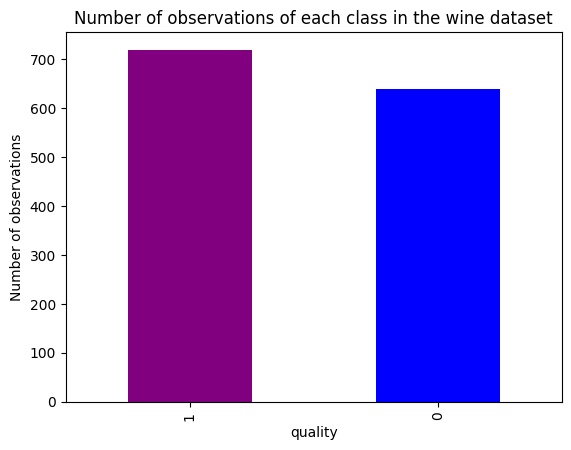

In [15]:
y.value_counts().plot.bar(color=['purple', 'blue'], grid=False)
plt.ylabel('Number of observations')
plt.title('Number of observations of each class in the wine dataset');

#### 2.6.2 Default Rate

Imagine we have a naive classifier that always predict the majority class. We call the default rate (or base rate) the accuracy of this classifier, which is equal to the size of the most common class over the size of the full dataset:

$$\text{Default rate} = \frac{\# \text{ most frequent class}}{\# \text{ total observations}}$$

If the default rate is too high, then the classification can be biased, meaning that the data set has too many observations of one class compared to the other classes, and has hence more impact on the classification results.

The accuracy of our classifier should be better than the default rate. Let's calculate this default rate!

In [16]:
# Compute the default rate
quality_0 = wines.loc[wines["quality"] == 0].shape[0]
print('# occurrence of class 0: ', quality_0)
quality_1 = wines.loc[wines["quality"] == 1].shape[0]
print('# occurence of class 1: ', quality_1)
defaultrate = max(quality_0, quality_1)/(wines["quality"].shape[0])
print(f'Default rate = {defaultrate:0.4f}')

# occurrence of class 0:  640
# occurence of class 1:  719
Default rate = 0.5291


Our default rate is about 52.9% while our classifier accuracy is 72.4%. Not too bad!

#### 2.6.3 Confusion matrix

The confusion matrix allows us to get more details on the performance of our model. It will allow us to see what our classification model is getting right and what types of errors it is making.

Here is how a confusion matrix looks like:

|   | Class 0 predicted  | Class 1 predicted  |    
|---|---|---|
| **Class 0 actual**  |  TN |FP   |    
| **Class 1 actual**  | FN  | TP  |   


where TP = true positive, FN = false negative, FP = false positive and TN = true negative. Here class 1 is considered the "True" class.

And here is how to calculate TN, TP, FP, FN on a multiple row confusion matrix :

<img src='https://i.sstatic.net/AuTKP.png' width="400">

We are using the `confusion_matrix` module of sklearn, imported with the following line of code:

``` python
from sklearn.metrics import confusion_matrix
```

It requires as input the true values and the predicted values:

In [17]:
confusion_matrix(y_test, y_pred)

array([[113,  45],
       [ 49, 133]])

To obtain a more visual representation, we will use `heatmap` from the `seaborn` library:

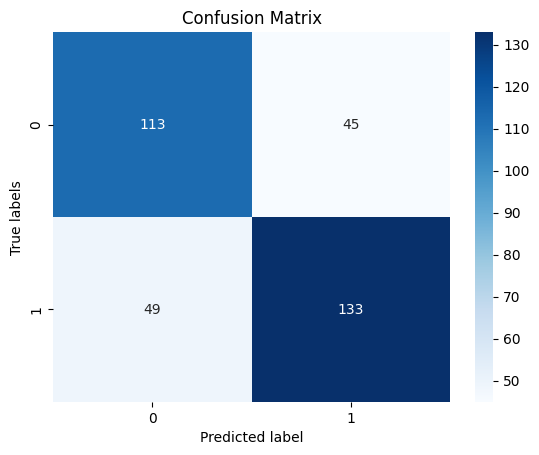

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix');

On the diagonal of the confusion matrix are our correct predictions, while the off-diagonal elements are incorrect predictions. We can thus quickly identify whether one class is driving down or up the accuracy results, or if the results are more balanced.

Recall that the accuracy is the number of correct predictions divided by the number of incorrect predictions. Thus, the accuracy is the sum of the diagonal elements of the confusion matrix, divided by the total number of elements:

In [19]:
print('Accuracy on test set using sklearn: {:.6f}'.format(accuracy_score(y_test, y_pred)))
print('Accuracy on test set by hand: {:.6f}'.format((113+133)/(113+133+45+49)))

Accuracy on test set using sklearn: 0.723529
Accuracy on test set by hand: 0.723529


#### 2.6.4 Precision and Recall

In many contexts, the accuracy would be an appropriate way to evaluate a model, but in others, this would be insufficient.

For example, suppose we want to use a classification model to predict the likelihood of someone having a rare, but serious health condition. If the condition is very rare (say it appears in 0.01% of the population), then a model that always predicts false would have 99.99% accuracy, but the false negatives could have large consequences.

To capture such situations, we often use two other very common metrics: the *precision* and *recall*.

Let class 1 represents our positive cases ("true" class), the confusion matrix is:

|   | Class 0 predicted  | Class 1 predicted  |    
|---|---|---|
| **Class 0 actual**  |  TN | FP   |    
| **Class 1 actual**  | FN  | TP  |

- *Precision*: The number of true positives over the number of positive  predictions. Precision tells us how often the model was correct when it predicted true.

$$\text{Precision} = \frac{\# \text{ true positives}}{\# \text{ predicted positives}} = \frac{ \text{TP}}{\text{TP+FP}}$$

- *Recall*: The number of true positives over the number of actual positives. Recall answers the question, “What fraction of the positives did we get correct?”  

$$\text{Recall} = \frac{\# \text{ true positives}}{\# \text{ actual positives}} = \frac{\text{TP}}{ \text{TP+FN}}$$

In many settings, both precision and recall are equally important and a compound metric known as the *F1-score* is used:

$$\text{F1} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

The F1 score is bounded between 0 and 1. It will only achieve a value of 1 if both precision and recall are exactly 1.

We will compute the precision using `precision_score` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)), the recall using `recall_score` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)), and the F1 score using `f1_score` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)). Here are the import lines:

``` python
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
```

For a binary classifier, all metrics will report by default the scores associated with the positive class (i.e., with observations equal to 1). If we are interested in the results for another class, we can specify some parameters. For instance, the parameter `average = None` will return the scores of each class:

In [20]:
print('The precision for class 1 (good wines) is: {:0.3f}'.format(precision_score(y_test, y_pred)))
print('The recall for class 1 is: {:0.3f}'.format(recall_score(y_test, y_pred)))
print('The F1 score for class 1 is: {:0.3f}'.format(f1_score(y_test, y_pred)))

The precision for class 1 (good wines) is: 0.747
The recall for class 1 is: 0.731
The F1 score for class 1 is: 0.739


In [21]:
# Precision of each class
model_precision = precision_score(y_test, y_pred, average = None)
# Recall of each class
model_recall = recall_score(y_test, y_pred, average = None)
# F1 score of each class
model_f1 = f1_score(y_test, y_pred, average = None)

# Visualize all results in a dataframe:
model_eval = pd.DataFrame([model_precision, model_recall, model_f1],
                    index = ['Precision', 'Recall', 'F1 score'],
                    columns=['Class 0', 'Class 1'])
model_eval

,Class 0,Class 1
Precision,0.697531,0.747191
Recall,0.715190,0.730769
F1 score,0.706250,0.738889


Evaluating your classifier is key, and it depends on our objectives and on our data. You can find all the sklearn model evaluation metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

#### 2.6.5 Classification Report

To gain a comprehensive breakdown of our model's performance metrics, including precision, recall, F1-score, and support for each class, we utilize the classification report. This detailed assessment helps provide deeper insights into how effectively the logistic regression model classifies each category.

In [22]:
# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       158
           1       0.75      0.73      0.74       182

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340



### 2.7 Adding cross-validation

Roughly speaking, cross-validation splits the training dataset into many training/testing subsets, then chooses the regularization parameter value that minimizes the average MSE.

More precisely, k-fold cross-validation does the following:

1. Partition the dataset randomly into k subsets/”folds”.  
2. Compute $MSE_j(\alpha)=$ mean squared error in j-th subset when using the j-th subset as test data, and other k-1 as training data.  
3. Minimize average (across folds) MSE $\min_\alpha \frac{1}{k}\sum_{j=1}^k MSE_j(\alpha)$.

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png' width="500">

You can find a more detailed description of cross-validation [here](https://scikit-learn.org/stable/modules/cross_validation.html).

With the argument `cv`, we can specify the number of folds:

We will see how the performance of our model evolves when implementing cross-validation technique. We are using the `LogisticRegressionCV()` module ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)), imported as follows:

```python
from sklearn.linear_model import LogisticRegressionCV
```

In [23]:
# Set up our model
model_cv = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5, max_iter=1000)

# Fit our model
model_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

Let's check the accuracy of our new model and compare it to the previous one:

In [24]:
# Accuracy on the test set
model_cv_test_accuracy = model_cv.score(X_test, y_test) # Cross-validation model
model_test_accuracy = model.score(X_test, y_test)       # Logistic regression
# Accuracy on the training set
model_cv_train_accuracy = model_cv.score(X_train, y_train) # Cross-validation model
model_train_accuracy = model.score(X_train, y_train)       # Logistic regression
# Gather results in a dataframe:
models_accuracy = [[model_cv_test_accuracy, model_test_accuracy],
                   [model_cv_train_accuracy, model_train_accuracy]]
model_compar = pd.DataFrame(models_accuracy,
                    index = ['Test accuracy', 'Train accuracy'],
                    columns=['Cross-validation model', 'Logistic regression'])
model_compar

,Cross-validation model,Logistic regression
Test accuracy,0.726471,0.723529
Train accuracy,0.751717,0.744848


The accuracy improved a bit. Let's have a look at the confusion matrix:

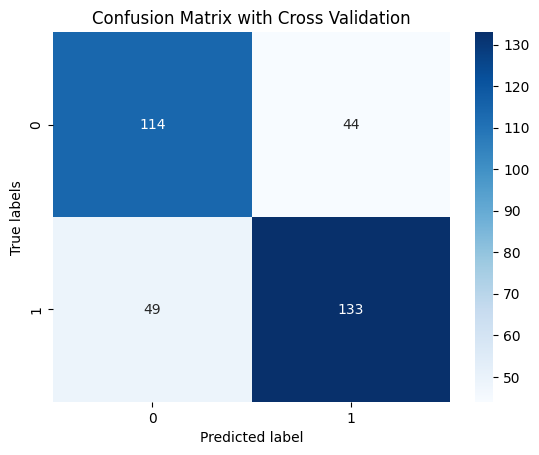

In [25]:
# Confusion matrix
confusion_cv = confusion_matrix(y_test, model_cv.predict(X_test))
# Heatmap of confusion matrix
sns.heatmap(confusion_cv, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Cross Validation');

We correctly predicted one additional observation from the class 0. Not a spectacular improvement but we'll take it!

## Your turn !

Now it's your turn to implement a classifier! In this application, you will try to predict whether a forest fire spread and burned forest areas in the Montesinho natural park in Portugal.

We are using the [Forest Fires dataset](https://www.kaggle.com/datasets/sumitm004/forest-fire-area), created by Paulo Cortez and Aníbal Morais, and available on Kaggle.

Source: P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.

The original dataset contains 13 columns:
- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: "jan" to "dec"
- day - day of the week: "mon" to "sun"
- FFMC - Fine Fuel Moisture Code (FFMC) index from the [Fire Weather Index (FWI)](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system) system: 18.7 to 96.20
- DMC - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 291.3
- DC - Drought Code (DC) index from the FWI system: 7.9 to 860.6
- ISI - Initial Spread Index (ISI) index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84

In addition, we created a new column, "class", detailing whether the fire burned an area of forest:
- class is equal to 0 if area = 0.00 ha
- class is equal to 1 if area > 0.00 ha

Our goal will be to predict the class using logistic regression, given the weather and FWI features.

In [26]:
# Load data
url_ff = 'https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/04-classification/data/forestfires.csv'
forest_fire = pd.read_csv(url_ff)

### Discover your dataset

Explore your dataset, displaying a few observations, the types of your data, some summary statistics, the classification report and the confusion matrix. Feel free to push forward your EDA using a few graphs e.g., boxplot and pairplot.

In [27]:
# YOUR CODE HERE

### Multi-features logistic regression

We'll start with only four features, the temperature, the rain, the FFMC and wind.

- Define your features and target variable ('class'):

In [28]:
# YOUR CODE HERE

- Split you data intro training and test set:

In [29]:
# YOUR CODE HERE

- Rescale your data, using the scaler of your choice:

In [30]:
# YOUR CODE HERE

- Build and train a simple logistic regression classifier:

In [31]:
# YOUR CODE HERE

- Compare the training and testing accuracy of your model

In [32]:
# YOUR CODE HERE

The accuracy seems low, which was expected following our EDA. Let's try to gather more information to better evaluate our classifier.

- Plot the distribution of class

In [33]:
# YOUR CODE HERE

- Compute the default rate and compare it to the accuracy of your model. What do you think?

In [34]:
# YOUR CODE HERE

The default rate is almost equal to our accuracy, so our classifier does not outperform a naive classifier that would always predict class 1...

- Plot the confusion matrix

In [35]:
# YOUR CODE HERE

- Generate a classification to get insight for each class

In [36]:
# YOUR CODE HERE

## 3. Decision Trees  <a id = "DT"></a>

<img src='https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png' width="400">

Source: [Simple Explanation on How Decision Tree Algorithm Makes Decisions](https://regenerativetoday.com/simple-explanation-on-how-decision-tree-algorithm-makes-decisions/)

### 3.1 Background  <a id = "DT-Background"></a>

#### 3.1.1 Intuition <a id = "DT-Intuition"></a>

Decision trees, as the name goes, use a tree-like model of decisions. At each node, the algorithm chooses a splitting rule (based on a feature) that maximizes the accuracy of the model. More precisely, at every split the algorithm maximizes a certain criterion previously given (e.g., Gini index, information gain).

The objective of the algorithm is to find the simplest possible decision tree (i.e., only a few nodes = a small depth) with the highest accuracy.

Consider the example below, where the objective is to classify if a person is fit or not. If we would have chosen another criterion for the root node (e.g., "Exercises in the morning" intead of "Age<30"), we could have ended up with a lower accuracy and/or more splits (i.e., a more complex tree). The same logic applies at each decision node, until we reach the leafs, i.e., the final decision.

<img src='https://cdn.educba.com/academy/wp-content/uploads/2019/05/is-a-person-fit.png' width="300">

Decision Trees are simple to understand, interpret, and visualize. They can handle both numerical and categorical data, they do not require feature scaling and can deal with outliers. The algorithm is also good at at handling non-linearly separable data.

As a drawback, Decision Trees suffer for a risk of overfitting, especially with large dataset since the tree might become too complex. They can also be unstable because small variations in the data might result in a completely different tree being generated. Potential solutions to avoid overfitting and get better performance include:
- Rely on cross-validation to find the proper depth.
- Building a collection of trees, i.e., a Random Forest - you can for instance read [Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) for more explanation on the topic.

Finally, note that, as for KNN, Decision Trees can be used for both classification and regression. You can read [Machine Learning Basics: Decision Tree Regression](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda) for a walk through on how to apply Decision Tree for regression tasks.

#### 3.1.2 Decision criteria  <a id = "DT-Decision"></a>

Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. How to do so? We need decision criteria, which evaluate the cost of a split, or alternatively, the "purity" of the selection. Here are some measures:

- [Information Gain](https://en.wikipedia.org/wiki/Information_gain_(decision_tree)) measures... the information gained thanks to the split, relying on the notion of [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)):
$$\text{Entropy}= - \sum_{i=1}^c p_i \log_2(p_i)$$
where $c$ is the number of class and $p_i$ is the probability of randomly selecting an observation in class $i$. Let's consider two classes "0" and "1" for simplicity: $\text{Entropy} = - p_0 \log_2(p_0) - p_1 \log_2(p_1)$:
    - When our dataset (or node) has 50% of observations belonging to class "0" and 50% belonging to class "1", then $p_0=p_1=1/2$ and $\text{Entropy} = 1$.
    - When our dataset (or node) is "pure", say 0% of observations belonging to class "0" and 100% to class "1", then $p_0=0$, $p_1=1$, and $\text{Entropy} = 0$

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Binary_entropy_plot.svg/800px-Binary_entropy_plot.svg.png' width="300">
</center>

Source: Brona, Wikipedia [Binary entropy plot](https://commons.wikimedia.org/wiki/File:Binary_entropy_plot.svg)

At each decision node, we compute the associated Entropy. This allows to calculate the information gain:
$$\text{Information Gain}=\text{Entropy}_\text{parent}-\text{Average Entropy}_\text{children}$$

Our objective is to obtain pure leaf nodes, and thus to reduce the entropy in the children nodes. Say differently, we need to find the splits that maximize the Information Gain.

- Gini Index, also called [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), is an alternative decision criterion, inspired by the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient), a measure intended to represent the wealth inequality within a nation or a social group. The Gini of a dataset is:
$$\text{Gini}=1-\sum_{i=1}^c p_i^2$$
Let's again consider two classes for simplicity "0" and "1", $\text{Gini}=1-p_0^2-p_1^2$
    - When our dataset (or node) has 50% of observations belonging to class "0" and 50% belonging to class "1", then $p_0=p_1=1/2$ and $\text{Gini} = 0.5$.
    - When our dataset (or node) is "pure", say 0% of observations belonging to class "0" and 100% to class "1", then $p_0=0$, $p_1=1$, and $\text{Gini} = 0$

At each decision node we compute the associated Gini Index, and then the average Gini Index of the split. Our objective is to minimize the Gini Index.

For further information on the topic, you can read the articles:
- [Decision Trees Explained — Entropy, Information Gain, Gini Index, CCP Pruning](https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c)
- [Understanding the Gini Index and Information Gain in Decision Trees](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8)

### 3.2 Implementation  <a id = "DT-Implementation"></a>

We will use the same dataset, trying to predict the quality of the wine based on the same features. We are using the same training and test set for comparability between model.

#### 3.2.1 Building, training, and evaluating our classifier <a id = "DT-Building"></a>

We implement a Decision Tree algorithm to predict the class of our target variable using the **sklearn** module `DecisionTreeClassifier()` ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Here is the import line:

```python
from sklearn.tree import DecisionTreeClassifier
```

We can specify various parameters:
- `criterion`= determines how to measure the quality of a split: "gini" for Gini Impurity (default value), "entropy or "log_loss" for Information Gain
- `max_depth`= determines the depth of the tree, i.e., the amount of nodes we allow the tree to generate. If None (default value), then nodes are expanded until all leaves are pure or until all leaves contain less than a given number of samples.

Please refer to the documentation for the full list of parameters.

We will start by arbitrarily selecting a maximum depth of 3, and default values for the other parameters.

In [37]:
# Create model
model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

# Fit model
model_tree.fit(X_train, y_train)

# Test accuracy
print('Accuracy of Decision Tree on test set: {:.2f}'.format(model_tree.score(X_test, y_test)))
print('Accuracy of Decision Tree on training set: {:.2f}'.format(model_tree.score(X_train, y_train)))

Accuracy of Decision Tree on test set: 0.70
Accuracy of Decision Tree on training set: 0.73


Let's see if we can reduce max depth without losing accuracy by using cross validation.

### 3.3 Tuning parameters with cross-validation <a id = "DT-Tuning"></a>

Tuning the hyperparameters of a Decision Tree involves determining the best criteria and depth that lead to the most effective model. We use `GridSearchCV` to automate this optimization by testing combinations of criterion and `max_depth` values through systematic `cross-validation`.

We specify the criteria ('gini' and 'entropy') and maximum tree depths (1 to 3) to explore.

In [38]:
# Define parameters to test
grid_tree = {'criterion':['gini','entropy'] ,     # criterion
        'max_depth':np.arange(1,3),               # array from 1 to 3, maximum depth
       }

We set up GridSearchCV with the Decision Tree, the parameter grid, and 5-fold cross-validation, fitting it to the training data.

In [39]:
# Define and fit model
dec_tree = DecisionTreeClassifier()
dec_tree_cv = GridSearchCV(dec_tree, grid_tree, cv=5)
dec_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2])})

After identifying the optimal parameters, we evaluate and report the training and test scores.

In [40]:
# Print results
print("Hyperparameters:", dec_tree_cv.best_params_)
print("Best model:", dec_tree_cv.best_estimator_)
print("Train Score: {:0.2f}".format(dec_tree_cv.best_score_))
print("Test Score: {:0.2f}".format(dec_tree_cv.score(X_test, y_test)))

Hyperparameters: {'criterion': 'gini', 'max_depth': 2}
Best model: DecisionTreeClassifier(max_depth=2)
Train Score: 0.71
Test Score: 0.66


We could reduce the depth to 2 and still got a good accuracy on the test set. However, we should remember that we have a limited number of observations so the results should be understood with a grain of salt.

### 3.4 Visualize tree <a id = "DT-Visualize"></a>

We can visualize our Decision Tree, allowing us to get a better understanding of the decisions made by our algorithm and of the features that played a key role in our classification.

To do so, we are using the `plot_tree()` module of sklear ([Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)). Here is the import line:

```python
from sklearn.tree import plot_tree
```

We plot our first model.

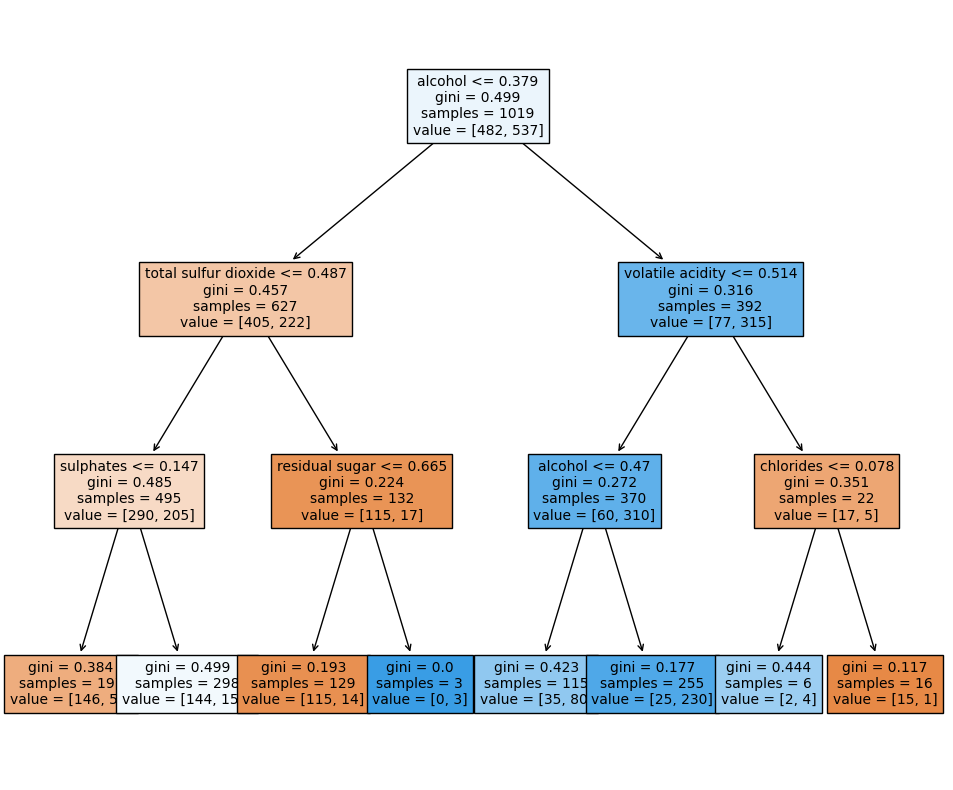

In [41]:
plt.figure(figsize=(12,10))
feature_names = list(X.columns.values)
plot_tree(model_tree, filled=True, feature_names=feature_names, fontsize=10)
plt.show()

Our tree starts with the root in which we have 1019 samples (our data points), 482 belonging to class 0 and 537 belonging to class 1.

Each node represents a condition on which the tree splits into branches. For instance, the first two depth levels are using the "aclohol" as feature to split, and the last node is using the mass.

The end of a branch that no longer splits is a leaf. Here we have perfectly classified our observations.

The colors represent the purity of a node. In our case, blue corresponds to class 0 and orange corresponds to class 1. They are displayed because we specified the parameter `filled = True`.

Finally, the gini coefficient is our measure of purity for each node. In our dataset we start with 0.499 (corresponds to the almost 50-50 distribution of classes in the root) and then gradually go down to 0 (maximum purity).

## Your turn !


Using the Forset Fires dataset again:

- Build and train a Decision Tree Classifier with a maximum depth of 4.

In [42]:
# YOUR CODE HERE

- Compare the accuracy on the training set and the test set, and create a heatmap of your confusion matrix

In [43]:
# YOUR CODE HERE

- Explore with `GridSearchCV` a grid of parameters. Check the accuracy on the training and test set.

In [44]:
# YOUR CODE HERE

Using the best parameters, visualize the decision tree:

In [45]:
# YOUR CODE HERE

## 4. k-Nearest Neighbords (kNN)

### 4.1 Intuition <a id="kNN-Intuition"></a>

The k-Nearest Neighbors (kNN) algorithm is a simple, yet powerful machine learning technique that predicts the label of a data point by looking at the 'k' closest labeled data points and letting them vote on what label the query point should have. It is inherently a lazy learning algorithm as it does not explicitly learn a model. Instead, it memorizes the training dataset.

The primary principle behind kNN is that similar things exist in close proximity. In other words, similar data points are near to each other in the feature space. The proximity or closeness of points is calculated using distance measures such as Euclidean, Manhattan, or Minkowski distance.

Consider an example where we want to classify whether a customer will buy a product or not. If we choose k=3, the algorithm looks at the three nearest neighbors of a customer to determine the purchasing behavior based on the majority vote of the neighbors' purchasing statuses.

<img src='https://miro.medium.com/v2/resize:fit:990/1*3SwcOCUyVdGauhHrHvOaLA.png' width="500">

The algorithm is versatile and can handle both classification and regression tasks but is predominantly known for its application in classification. It’s easy to implement and understand but becomes significantly slower as the size of the data in use grows.

**Benefits of kNN:**
- No assumptions about the data — no need to build a model, tune several parameters, or make additional assumptions.
- Adapts easily to real-time data.
- Very easy to implement for multi-class problems.

**Drawbacks of kNN:**
- The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.
- Sensitive to the scale of the data and irrelevant features.
- Poor performance on imbalanced datasets.
- It requires a good definition of what it means for two points to be close or similar.

**To improve kNN performance:**
- Pre-processing data with scaling can bring improvement.
- Choosing the right value of k is crucial — too low a value of k can be noisy and lead to effects of outliers, while a high value makes computation expensive and might also include points from other classes.
- Weighted kNN can help if some types of votes are more important than others.
  
For more in-depth understanding and practical applications of kNN, consider reading [K-Nearest Neighbor by Anthony Christopher](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4) which offers further insights and examples.

### 4.2 Implementation

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Train the Decision Tree Classifier on the training data
knn_classifier.fit(X_train, y_train)

# Evaluate the model's performance on the training set
train_accuracy = knn_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f} or {train_accuracy * 100:.2f}%")

# Evaluate the model's performance on the test set
test_accuracy = knn_classifier.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f} or {test_accuracy * 100:.2f}%")

Training Accuracy: 0.8096 or 80.96%
Test Accuracy: 0.7000 or 70.00%


## 4. Encoding categorical variable

Categorical data represents types of data which may be divided into groups. Examples include race, sex, age group, and educational level. While this data can be very informative, most machine learning algorithms require numerical input and output variables. Thus, converting categorical data into a form that could be provided to ML algorithms to do a better job in prediction is essential. Two common approaches to this problem are One-Hot Encoding and Label Encoding, which convert categorical data into numerical format, each in a different way.

### 5.1 One-Hot Encoding
One-Hot Encoding transforms each categorical feature with n possible values into n binary features, with only one active. This method creates new columns indicating the presence of each possible value from the original data. For instance, a feature like "Color" with three categories (Red, Blue, Green) will transform into three features: 'Color_Red', 'Color_Blue', and 'Color_Green'. Each will have a binary value:

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width="800px">

Advantages:
- Prevents the model from assuming a natural ordering between categories which can result in poor performance or unexpected results (assumes no hierarchy).
- Very effective when the categorical feature is not ordinal (i.e., the categories are not in any particular order).

Disadvantages:
- The number of features can explode with categorical variables with many levels, leading to high memory consumption and potentially degraded model performance.

### 5.2 Label Encoding

Label Encoding converts each value in a categorical column into a number. These numerical values can be used in the algorithms directly. For example, "Color" can be encoded as Red=1, Green=2, Blue=3.

<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F6476f92b-cebf-4cea-8098-ebc92e2d6166_1326x705.jpeg" width="600px">

Advantages:
- Keeps the dataset compact, which is particularly useful if there are many levels in the categorical variable.
- Simple to implement and does not increase the dimensionality of the data.

Disadvantages:
- The numerical assignment introduces an order or priority (e.g., Blue is greater than Green), which might lead to poor performance or unexpected results if such a hierarchy does not exist.

### 5.3 Implementation

Load the [dataset](https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/04-classification/data/student-performance-factor.csv) from github about student performance factors and remove columns that are not required for the analysis. Display the first few rows of the cleaned dataset to verify the changes.

In [47]:
# Import the dataset
df_student = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/04-classification/data/student-performance-factor.csv")
df_student = df_student.drop(columns=['Access_to_Resources', 'Parental_Involvement', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home', 'Learning_Disabilities', 'Gender', 'Internet_Access'])
df_student.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,No,7,73,Low,0,3,67
1,19,64,No,8,59,Low,2,4,61
2,24,98,Yes,7,91,Medium,2,4,74
3,29,89,Yes,8,98,Medium,1,4,71
4,19,92,Yes,6,65,Medium,3,4,70


As you can see, we have 2 columns that contains categorical value : "Extracurricular_Activities", "Motivation_Level"

We can then identify and display the unique values in the 'Extracurricular_Activities' and 'Motivation_Level' columns to understand the variety of data entries.

In [48]:
# Print the unique values
print("Unique values in 'Extracurricular_Activities' column:")
print(df_student['Extracurricular_Activities'].unique())

# Print the unique values
print("\nUnique values in 'Motivation_Level' column:")
print(df_student['Motivation_Level'].unique())


Unique values in 'Extracurricular_Activities' column:
['No' 'Yes']

Unique values in 'Motivation_Level' column:
['Low' 'Medium' 'High']


After, we can apply one-hot encoding to the 'Extracurricular_Activities' column to handle nominal data and label encoding to 'Motivation_Level' for ordinal data. Display the first few rows of each to inspect the encoded data.

In [49]:
#Apply one-hot encoding to nominal variables
ohe_fit_Extra_Act = OneHotEncoder().fit(df_student[["Extracurricular_Activities"]])
ohe_Extra_Act = ohe_fit_Extra_Act.transform(df_student[["Extracurricular_Activities"]]).toarray()
ohe_Extra_Act = pd.DataFrame(ohe_Extra_Act, columns=ohe_fit_Extra_Act.get_feature_names_out())
display(ohe_Extra_Act.head())


# Apply label encoding to ordinal variables
le_fit_Motivation = LabelEncoder().fit(df_student["Motivation_Level"])
le_Motivation_Level = pd.DataFrame(le_fit_Motivation.transform(df_student["Motivation_Level"]), columns=["le_Motivation_Level"])
display(le_Motivation_Level.head(10))


,Extracurricular_Activities_No,Extracurricular_Activities_Yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


,le_Motivation_Level
0,1
1,1
2,2
3,2
4,2
5,2
6,1
7,2
8,0
9,2


Then, we merge the encoded columns back into the main dataset and remove the original unencoded columns. And we display the new shape of the dataset and the first few rows to see the updated structure.

In [50]:
df_student_encoded = pd.concat([df_student, ohe_Extra_Act, le_Motivation_Level], axis=1)

# Drop the original columns that have been encoded if they exist
columns_to_drop = ["Extracurricular_Activities", "Motivation_Level"]
df_student_encoded.drop(columns_to_drop, axis=1, inplace=True)

# Now df has the original data minus the categorical columns, plus the new encoded columns
print(df_student_encoded.shape)
display(df_student_encoded.head())

(6607, 10)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_No,Extracurricular_Activities_Yes,le_Motivation_Level
0,23,84,7,73,0,3,67,1.0,0.0,1
1,19,64,8,59,2,4,61,1.0,0.0,1
2,24,98,7,91,2,4,74,0.0,1.0,2
3,29,89,8,98,1,4,71,0.0,1.0,2
4,19,92,6,65,3,4,70,0.0,1.0,2
